In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [23]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [24]:
# Tidak perlu one hot encode
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [25]:
# Tidak ada data yang kosong
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [26]:
# Data meninggal
data.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [27]:
death = len(data[data.DEATH_EVENT == 1])
alive = len(data[data.DEATH_EVENT == 0])

print("Persentase pasien Meninggal : {:.2f}%".format((death/len(data.DEATH_EVENT))*100))
print("Persentase pasien Selamat : {:.2f}%".format((alive/len(data.DEATH_EVENT))*100))

Persentase pasien Meninggal : 32.11%
Persentase pasien Selamat : 67.89%


In [28]:
# Deskripsi dataset
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [29]:
# data x (selain mortality)
x = data.drop(['DEATH_EVENT'], axis=1)
# data y (mortality)
y = data['DEATH_EVENT']

In [30]:
#MinMaxScaler Normalization
x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x)).values
x_normalized.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,0.378798,0.431438,0.071299,0.418060,0.364903,0.351171,0.288833,0.100436,0.675012,0.648829,0.32107,0.449327
std,0.216269,0.496107,0.123793,0.494067,0.179316,0.478136,0.118565,0.116237,0.126071,0.478136,0.46767,0.276207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.200000,0.000000,0.011929,0.000000,0.242424,0.000000,0.227179,0.044944,0.600000,0.000000,0.00000,0.245552
50%,0.363636,0.000000,0.028961,0.000000,0.363636,0.000000,0.287186,0.067416,0.685714,1.000000,0.00000,0.395018
75%,0.545455,1.000000,0.071319,1.000000,0.469697,1.000000,0.337495,0.101124,0.771429,1.000000,1.00000,0.708185
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [31]:
# memilah data untuk train dan mencoba (data untuk test sebanyak 10%)
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.1, random_state=0)
akurasi = {}

In [32]:
# Algoritma Decision Tree gini
dtree1 = DecisionTreeClassifier(criterion='gini')
dtree1.fit(x_train, y_train)

accScoreDTGini = dtree1.score(x_test, y_test) * 100

akurasi['Decision Tree (Gini)'] = accScoreDTGini

print('Akurasi Test Decision Tree (Gini) {:.2f}%'.format(accScoreDTGini))

Akurasi Test Decision Tree (Gini) 80.00%


In [33]:
# Algoritma Decision Tree entropy
dtree2 = DecisionTreeClassifier(criterion='entropy')
dtree2.fit(x_train, y_train)

accScoreDTEntropy = dtree2.score(x_test, y_test) * 100

akurasi['Decision Tree (Entropy)'] = accScoreDTEntropy

print('Akurasi Test Decision Tree (Entropy) {:.2f}%'.format(accScoreDTEntropy))

Akurasi Test Decision Tree (Entropy) 93.33%


In [34]:
# SVM Kernel 'linear'
svmLinear = SVC(kernel = 'linear')
svmLinear.fit(x_train, y_train)

accScoreSVMLinear = svmLinear.score(x_test, y_test) * 100

akurasi['SVM (linear)'] = accScoreSVMLinear

print('Akurasi Test SVM (linear) : {:.2f}%'.format(accScoreSVMLinear))

Akurasi Test SVM (linear) : 83.33%


In [35]:
# SVM Kernel 'rbf'
svmRbf = SVC(kernel = 'rbf')
svmRbf.fit(x_train, y_train)

accScoreSVMRbf = svmRbf.score(x_test, y_test) * 100

akurasi['SVM (rbf)'] = accScoreSVMRbf

print('Akurasi Test SVM (rbf) : {:.2f}%'.format(accScoreSVMRbf))

Akurasi Test SVM (rbf) : 83.33%


In [36]:
# SVM Kernel 'sigmoid'
svmSigmoid = SVC(kernel = 'sigmoid')
svmSigmoid.fit(x_train, y_train)

accScoreSVMSigmoid = svmSigmoid.score(x_test, y_test) * 100

akurasi['SVM (sigmoid)'] = accScoreSVMSigmoid

print('Akurasi Test SVM (sigmoid) : {:.2f}%'.format(accScoreSVMSigmoid))

Akurasi Test SVM (sigmoid) : 50.00%


In [37]:
#knn
# Mencari nilai K terbaik
scoreList = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    scoreList.append(knn.score(x_test, y_test))

In [38]:
scoreList

[0.8,
 0.7333333333333333,
 0.8333333333333334,
 0.7333333333333333,
 0.7333333333333333,
 0.7,
 0.6333333333333333,
 0.7,
 0.7]

In [39]:
# nilai K terbaik terdapat saat K = 3
accScoreKNN = max(scoreList) * 100
akurasi['KNN'] = accScoreKNN
print('Akurasi Test KNN : {:.2f}%'.format(accScoreKNN))

Akurasi Test KNN : 83.33%


In [40]:
logisticRegression = LogisticRegression()
logisticRegression.fit(x_train, y_train)

accScoreLogisticRegression = logisticRegression.score(x_test, y_test) * 100
akurasi['Logistic Regression'] = accScoreLogisticRegression
print('Akurasi Test Logistic Regression : {:.2f}%'.format(accScoreLogisticRegression))

Akurasi Test Logistic Regression : 83.33%


In [41]:
akurasi

{'Decision Tree (Gini)': 80.0,
 'Decision Tree (Entropy)': 93.33333333333333,
 'SVM (linear)': 83.33333333333334,
 'SVM (rbf)': 83.33333333333334,
 'SVM (sigmoid)': 50.0,
 'KNN': 83.33333333333334,
 'Logistic Regression': 83.33333333333334}

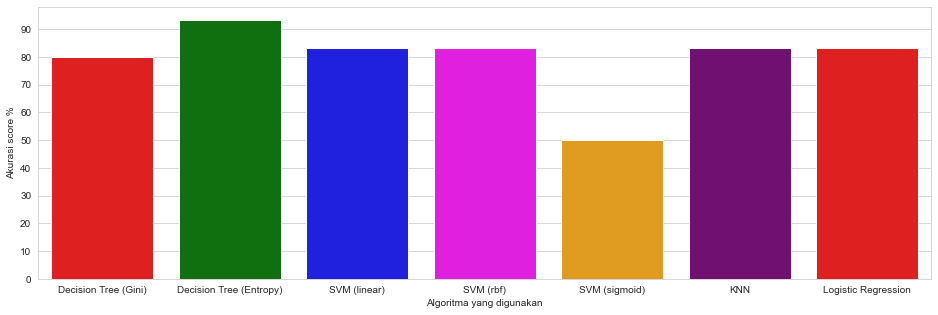

In [42]:
col = ["red", "green", "blue", "magenta","orange", "purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Akurasi score %")
plt.xlabel("Algoritma yang digunakan")
sns.barplot(x=list(akurasi.keys()), y=list(akurasi.values()), palette=col)
plt.show()